# Importing Required libraries

In [2]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
import pickle
import joblib
import xgboost as xgb
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,ConfusionMatrixDisplay

# Connecting To Drive to get Data

In [3]:
#Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
#Path of dataset
folder1="/content/drive/MyDrive/CV_CP_Dataset/glioma_tumor"
folder2="/content/drive/MyDrive/CV_CP_Dataset/meningioma_tumor"
folder3="/content/drive/MyDrive/CV_CP_Dataset/no_tumor"
folder4="/content/drive/MyDrive/CV_CP_Dataset/pituitary"

# Pre-processing and Feature Extraction using HOG

In [28]:
#Floder 1 (Glioma Tumor)
hog_descs = []
i = 0
for filename in os.listdir(folder1):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder1, filename))
    if img is not None:
        
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)
        
        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)
    
        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 0
#add row of class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("glioma.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

In [29]:
#Folder 2 (Meningioma Tumor)
hog_descs = []
i = 0
for filename in os.listdir(folder2):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder2, filename))
    if img is not None:
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)
        
        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)

        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 1
#add row class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("meningioma.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

In [30]:
#Folder 3 (No tumor)
hog_descs = []
i = 0
for filename in os.listdir(folder3):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder3, filename))
    if img is not None:
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)

        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)

        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 2
#add row class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("notumor.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

In [31]:
#Folder 4 (Pituitary)
hog_descs = []
i = 0
for filename in os.listdir(folder4):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder4, filename))
    if img is not None:
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)

        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)

        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 3
#add row class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("pituitary.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

In [32]:
# Load the Hog features of All class Glioma, Meningioma, no tumor
glioma_array = np.load('glioma.npy')
meningioma_array = np.load('meningioma.npy')
notumor_array = np.load('notumor.npy')
pitutary_array = np.load('pituitary.npy')

concatenated_array = np.concatenate((glioma_array, meningioma_array,notumor_array,pitutary_array), axis=0)

# prints the shape of the concatenated array
print(concatenated_array.shape)  

(819, 15001)


In [33]:
x = concatenated_array[:, :15000]   # selects columns up to 15000 for x
y = concatenated_array[:, -1]       # selects the last column for y
y = y.astype(np.int)

<ipython-input-33-07b9d91abc54>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [34]:
print(x.shape)  # prints the shape of x
print(y.shape)  # prints the shape of y

(819, 15000)
(819,)


# Applying PCA to Final Data

[1.15294614e-01 3.33951789e-02 2.75911921e-02 2.05936763e-02
 1.68551390e-02 1.26709253e-02 1.00672386e-02 9.20122020e-03
 8.84295312e-03 7.99128512e-03 7.34785851e-03 6.79608290e-03
 6.07155706e-03 5.43759631e-03 5.06383006e-03 4.81090665e-03
 4.62704232e-03 4.57032693e-03 4.44593317e-03 4.39383754e-03
 4.35987733e-03 4.09775819e-03 3.92967425e-03 3.78411913e-03
 3.72152498e-03 3.63845628e-03 3.51043537e-03 3.47986811e-03
 3.41658056e-03 3.32024256e-03 3.26856699e-03 3.06576994e-03
 3.05769350e-03 2.96652878e-03 2.91261166e-03 2.89728715e-03
 2.81420204e-03 2.76554450e-03 2.75101037e-03 2.66554018e-03
 2.58929781e-03 2.57589098e-03 2.54382633e-03 2.54002835e-03
 2.50366208e-03 2.45947446e-03 2.44744493e-03 2.39877812e-03
 2.39577324e-03 2.31359551e-03 2.30375184e-03 2.24075656e-03
 2.22372770e-03 2.21734947e-03 2.17232371e-03 2.15135602e-03
 2.12260817e-03 2.11406719e-03 2.08177723e-03 2.07233406e-03
 2.03625382e-03 2.01115096e-03 1.99529647e-03 1.97604980e-03
 1.95539980e-03 1.934373

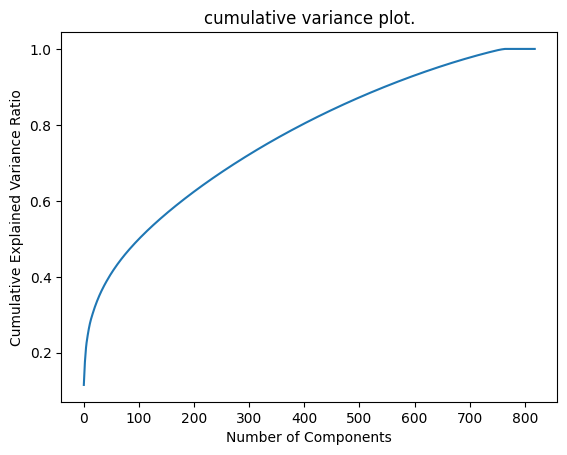

In [35]:
from sklearn.decomposition import PCA
# Create a PCA object
pca = PCA()

# Fit the PCA model to the HOG features
pca.fit(x)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio against number of components
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('cumulative variance plot.')
plt.show()

In [36]:
B = pca.transform(x)
B = pd.DataFrame(B)
B 

,0,1,2,3,4,5,6,7,8,9,...,809,810,811,812,813,814,815,816,817,818
0,-8.720498,-0.718943,7.344475,-5.019993,2.972138,-2.694931,1.012865,-2.642193,-0.291650,2.603323,...,2.619432e-16,4.198031e-16,-1.353084e-16,1.179612e-16,1.543904e-16,7.372575e-17,1.980024e-16,-2.810252e-16,-4.770490e-17,-5.551115e-17
1,-6.836700,5.511056,-5.570796,-1.878947,-3.082066,-1.256952,1.487936,0.384629,0.425995,-1.461543,...,-8.847090e-17,8.014422e-16,1.071409e-15,-3.553147e-15,-1.536271e-14,1.271617e-14,-2.111158e-15,1.160877e-14,1.132601e-14,-3.747003e-16
2,-7.928142,-0.316115,4.801610,-4.613822,1.595030,-1.575491,2.177838,-1.330074,-0.734015,1.613760,...,3.330669e-16,-2.116363e-16,1.484490e-15,5.412337e-16,-5.741935e-16,9.506285e-16,1.311451e-15,-1.668370e-15,-2.983724e-16,1.072059e-15
3,-5.441441,-3.055086,-3.182304,5.874151,1.529061,1.911579,-0.030633,3.146452,-1.814132,-2.208771,...,-8.864437e-16,-8.500145e-17,4.172010e-16,2.229120e-16,2.175343e-15,-2.190956e-15,-1.198694e-15,1.682682e-16,-5.585810e-16,-2.263814e-16
4,-8.520650,1.721927,0.748552,-5.888913,-4.920356,0.063014,0.607203,-2.856861,0.280111,2.808741,...,-6.973588e-16,6.071532e-17,-1.784163e-15,2.594713e-15,3.809453e-15,-2.519686e-15,-1.356554e-15,-2.648055e-15,-1.391248e-15,7.502679e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,13.476857,-7.944396,-7.213875,-2.809705,0.005256,-3.974895,-5.209639,-1.480226,4.149589,-1.147685,...,7.494005e-16,-2.659331e-15,-1.275022e-15,-2.428613e-17,4.881512e-15,-1.889981e-15,3.631644e-15,-4.857226e-17,-6.422814e-16,3.767819e-15
815,13.536840,-6.464152,-7.608982,-2.276607,2.108261,-6.846088,-3.513205,0.920478,2.744007,-0.222448,...,-8.153200e-17,9.619042e-16,-3.200565e-16,-2.293304e-15,-3.106890e-15,4.961309e-15,-1.738193e-15,4.243134e-15,5.322132e-15,6.171279e-16
816,1.650063,-1.242528,-2.895635,8.284722,-2.867891,-4.223459,2.280612,0.573116,-3.622638,-2.371791,...,-1.266348e-15,3.144186e-17,5.169476e-16,1.310258e-16,6.918077e-15,-4.616099e-15,-8.361367e-16,-3.485059e-15,-4.468648e-15,1.505740e-15
817,14.725955,-6.570623,-7.567221,-2.377629,2.315000,-6.978596,-3.323298,1.509343,2.382955,0.207398,...,-1.415534e-15,2.827599e-16,-1.987993e-15,1.378238e-15,9.475060e-15,-3.001505e-15,5.334275e-16,-2.824130e-15,-5.677750e-15,5.030698e-17


In [37]:
pca = PCA(n_components=100)
pca.fit(x)

PCA(n_components=100)

In [38]:
# save the model to disk
import joblib
filename = 'PCA_model.sav'
pickle.dump(pca, open(filename, 'wb'))

In [39]:
B = pca.transform(x)
B = pd.DataFrame(B)
B

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-8.720498,-0.718943,7.344475,-5.019987,2.972149,-2.694833,1.012747,-2.642274,-0.291349,2.602518,...,0.444951,-0.866811,0.822590,0.197217,0.576740,-1.076545,1.153903,-0.250404,0.084269,0.147685
1,-6.836700,5.511055,-5.570796,-1.878958,-3.082058,-1.256946,1.487855,0.384801,0.426290,-1.461559,...,0.752203,0.131496,0.123770,-0.602932,-0.192753,-0.685597,1.022226,-0.219693,-0.964202,-1.678799
2,-7.928142,-0.316116,4.801611,-4.613818,1.595021,-1.575552,2.177729,-1.330075,-0.734232,1.613885,...,-0.251133,-0.200831,-0.652699,-1.182901,-0.989161,-1.644954,1.260927,0.547143,0.795456,-0.016017
3,-5.441441,-3.055086,-3.182303,5.874148,1.529055,1.911521,-0.030357,3.146791,-1.813548,-2.208351,...,0.362158,0.425612,1.106671,0.598337,-2.351340,-0.481134,0.296081,0.462254,-0.502468,-1.122441
4,-8.520650,1.721927,0.748552,-5.888918,-4.920350,0.063038,0.607378,-2.856904,0.280306,2.808974,...,-0.937072,-2.871044,0.441958,-0.085886,-0.426523,-1.514618,-0.519490,1.322607,-0.028021,-0.169796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,13.476857,-7.944396,-7.213874,-2.809719,0.005275,-3.974892,-5.209580,-1.480337,4.149171,-1.147922,...,1.187029,1.543218,1.763977,0.453848,0.161596,0.746695,-0.347853,0.736672,-1.010044,0.185761
815,13.536840,-6.464151,-7.608978,-2.276597,2.108250,-6.846113,-3.513218,0.920342,2.744017,-0.222562,...,-1.277865,-1.034293,-0.596846,0.873510,0.259000,0.512060,-0.234014,2.319960,-0.026442,-1.267507
816,1.650063,-1.242528,-2.895634,8.284709,-2.867874,-4.223439,2.280470,0.573094,-3.622312,-2.372217,...,-0.424747,-2.310707,-0.720776,-0.258904,0.994810,0.224578,-0.261388,-0.115814,0.644579,0.665295
817,14.725955,-6.570624,-7.567221,-2.377633,2.314992,-6.978741,-3.323163,1.509120,2.382457,0.207147,...,1.871514,0.180930,-1.927079,1.725447,2.339090,-0.644531,0.167468,0.989251,-0.887830,-0.076755


In [40]:
#Concatinate the Class ID's 
B=pd.concat([B, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,0
0,-8.720498,-0.718943,7.344475,-5.019987,2.972149,-2.694833,1.012747,-2.642274,-0.291349,2.602518,...,-0.866811,0.822590,0.197217,0.576740,-1.076545,1.153903,-0.250404,0.084269,0.147685,0
1,-6.836700,5.511055,-5.570796,-1.878958,-3.082058,-1.256946,1.487855,0.384801,0.426290,-1.461559,...,0.131496,0.123770,-0.602932,-0.192753,-0.685597,1.022226,-0.219693,-0.964202,-1.678799,0
2,-7.928142,-0.316116,4.801611,-4.613818,1.595021,-1.575552,2.177729,-1.330075,-0.734232,1.613885,...,-0.200831,-0.652699,-1.182901,-0.989161,-1.644954,1.260927,0.547143,0.795456,-0.016017,0
3,-5.441441,-3.055086,-3.182303,5.874148,1.529055,1.911521,-0.030357,3.146791,-1.813548,-2.208351,...,0.425612,1.106671,0.598337,-2.351340,-0.481134,0.296081,0.462254,-0.502468,-1.122441,0
4,-8.520650,1.721927,0.748552,-5.888918,-4.920350,0.063038,0.607378,-2.856904,0.280306,2.808974,...,-2.871044,0.441958,-0.085886,-0.426523,-1.514618,-0.519490,1.322607,-0.028021,-0.169796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,13.476857,-7.944396,-7.213874,-2.809719,0.005275,-3.974892,-5.209580,-1.480337,4.149171,-1.147922,...,1.543218,1.763977,0.453848,0.161596,0.746695,-0.347853,0.736672,-1.010044,0.185761,3
815,13.536840,-6.464151,-7.608978,-2.276597,2.108250,-6.846113,-3.513218,0.920342,2.744017,-0.222562,...,-1.034293,-0.596846,0.873510,0.259000,0.512060,-0.234014,2.319960,-0.026442,-1.267507,3
816,1.650063,-1.242528,-2.895634,8.284709,-2.867874,-4.223439,2.280470,0.573094,-3.622312,-2.372217,...,-2.310707,-0.720776,-0.258904,0.994810,0.224578,-0.261388,-0.115814,0.644579,0.665295,3
817,14.725955,-6.570624,-7.567221,-2.377633,2.314992,-6.978741,-3.323163,1.509120,2.382457,0.207147,...,0.180930,-1.927079,1.725447,2.339090,-0.644531,0.167468,0.989251,-0.887830,-0.076755,3


In [41]:
#Creating Final Feature File after applying PCA 
csv_data1=B.to_csv('Final_HOG_Feature.csv', mode='w',header=False,index=False)

In [42]:
# Reading recently saved file
train_data = pd.read_csv('Final_HOG_Feature.csv',header=None)

In [43]:
#Check for NaN under a single DataFrame column
train_data.isnull().values.any()

False

In [44]:
X = train_data.drop(columns= 100, axis=1)

In [45]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-8.720498,-0.718943,7.344475,-5.019987,2.972149,-2.694833,1.012747,-2.642274,-0.291349,2.602518,...,0.444951,-0.866811,0.822590,0.197217,0.576740,-1.076545,1.153903,-0.250404,0.084269,0.147685
1,-6.836700,5.511055,-5.570796,-1.878958,-3.082058,-1.256946,1.487855,0.384801,0.426290,-1.461559,...,0.752203,0.131496,0.123770,-0.602932,-0.192753,-0.685597,1.022226,-0.219693,-0.964202,-1.678799
2,-7.928142,-0.316116,4.801611,-4.613818,1.595021,-1.575552,2.177729,-1.330075,-0.734232,1.613885,...,-0.251133,-0.200831,-0.652699,-1.182901,-0.989161,-1.644954,1.260927,0.547143,0.795456,-0.016017
3,-5.441441,-3.055086,-3.182303,5.874148,1.529055,1.911521,-0.030357,3.146791,-1.813548,-2.208351,...,0.362158,0.425612,1.106671,0.598337,-2.351340,-0.481134,0.296081,0.462254,-0.502468,-1.122441
4,-8.520650,1.721927,0.748552,-5.888918,-4.920350,0.063038,0.607378,-2.856904,0.280306,2.808974,...,-0.937072,-2.871044,0.441958,-0.085886,-0.426523,-1.514618,-0.519490,1.322607,-0.028021,-0.169796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,13.476857,-7.944396,-7.213874,-2.809719,0.005275,-3.974892,-5.209580,-1.480337,4.149171,-1.147922,...,1.187029,1.543218,1.763977,0.453848,0.161596,0.746695,-0.347853,0.736672,-1.010044,0.185761
815,13.536840,-6.464151,-7.608978,-2.276597,2.108250,-6.846113,-3.513218,0.920342,2.744017,-0.222562,...,-1.277865,-1.034293,-0.596846,0.873510,0.259000,0.512060,-0.234014,2.319960,-0.026442,-1.267507
816,1.650063,-1.242528,-2.895634,8.284709,-2.867874,-4.223439,2.280470,0.573094,-3.622312,-2.372217,...,-0.424747,-2.310707,-0.720776,-0.258904,0.994810,0.224578,-0.261388,-0.115814,0.644579,0.665295
817,14.725955,-6.570624,-7.567221,-2.377633,2.314992,-6.978741,-3.323163,1.509120,2.382457,0.207147,...,1.871514,0.180930,-1.927079,1.725447,2.339090,-0.644531,0.167468,0.989251,-0.887830,-0.076755


In [46]:
Y  = train_data[100]

In [47]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
814    3
815    3
816    3
817    3
818    3
Name: 100, Length: 819, dtype: int64

# Applying Classifiers With K Fold Cross Validation

1. Logistic Regression

In [48]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_LR = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model_LR.fit(X_train,y_train)
    pred_values = model_LR.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
joblib.dump(model_LR, "LG_HOG.sav")

accuracy of each fold - [0.9634146341463414, 0.6829268292682927, 0.7621951219512195, 0.5670731707317073, 0.2147239263803681]
Avg accuracy : 0.6380667364955859


['LG_HOG.sav']

2. Random Forest

In [49]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_RF = RandomForestClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model_RF.fit(X_train,y_train)
    pred_values = model_RF.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8658536585365854, 0.6219512195121951, 0.676829268292683, 0.3597560975609756, 0.24539877300613497]
Avg accuracy : 0.5539578033817147


3.  KNN Classifier

In [50]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_knn=KNeighborsClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model_knn.fit(X_train,y_train)
    pred_values = model_knn.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9634146341463414, 0.5914634146341463, 0.7682926829268293, 0.5548780487804879, 0.2392638036809816]
Avg accuracy : 0.6234625168337573


4. XGBoost

In [51]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

model_xgb = xgb.XGBClassifier()

acc_score = []
y_pred_list = []
y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)

    y_pred_list.extend(y_pred)
    y_test_list.extend(y_test)

avg_acc_score = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score))

joblib.dump(model_xgb, "xgb.sav")

Accuracy of each fold - [0.9146341463414634, 0.9146341463414634, 0.9207317073170732, 0.926829268292683, 0.8773006134969326]
Average accuracy: 0.9108259763579231


['xgb.sav']

5. AdaBoost

In [52]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_AB = AdaBoostClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model_AB.fit(X_train,y_train)
    pred_values = model_AB.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.32926829268292684, 0.524390243902439, 0.42073170731707316, 0.6463414634146342, 0.09815950920245399]
Avg accuracy : 0.40377824330390544


6. SVM

In [53]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_SVM = SVC(kernel='linear')

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_SVM.fit(X_train, y_train)
    pred_values = model_SVM.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9634146341463414, 0.7134146341463414, 0.7804878048780488, 0.5914634146341463, 0.2085889570552147]
Avg accuracy : 0.6514738889720185


7. Decision Tree

In [54]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_DT = DecisionTreeClassifier()

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_DT.fit(X_train, y_train)
    pred_values = model_DT.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.7804878048780488, 0.5853658536585366, 0.6585365853658537, 0.5365853658536586, 0.2147239263803681]
Avg accuracy : 0.5551399072272931


8. Gradient Boosting

In [55]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_GBM = GradientBoostingClassifier()

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_GBM.fit(X_train, y_train)
    pred_values = model_GBM.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8719512195121951, 0.6402439024390244, 0.7560975609756098, 0.573170731707317, 0.24539877300613497]
Avg accuracy : 0.6173724375280563


# Results

In [ ]:
#Reading Image
img = cv2.imread("glioma.jpg")
plt.imshow(img)
plt.show()

#resize total  image size to 200 x 200
resize=(200,200)
img1=cv2.resize(img,resize)

#Grayscaling the Image
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Apply median filter with kernel size 3x3
median_img = cv2.medianBlur(gray, 3)

#Applying HOG Feature Descriptor
fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)

# Convert the descriptor array into a DataFrame format
print("descriptor shape ", i, " : ", fd.shape)

#Getting data in a Dataframe
df = pd.DataFrame(fd)

#Appling Transpose to dataframe to convert rows into column and column into rows
df_transposed = df.transpose()
df_transposed

#Loading the PCA Model
pca = joblib.load('PCA_model.sav')

#Applying the PCA to extracted Data
fd_pca = pca.transform(df_transposed)

In [ ]:
# Load the XGBoost model as it provides highest Accuracy
loaded_model = joblib.load("xgb.sav")

# Use the loaded model for prediction
y_pred = loaded_model.predict(fd_pca)

print(y_pred)
# Glioma = 0 
# Meningioma = 1
# No tumor = 2
# Pituitary = 3

if y_pred == 0:
    print("Given Image is of Glioma Tumor")
elif y_pred == 1:
    print("Given Image is of Meningioma Tumor")
elif y_pred == 2:
    print("Given Image is of No Tumor")
else:
    print("Given Image is of Pituitary Tumor")